In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
deliveries = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\deliveries_updated.csv')
matches = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\matches_updated_mens_ipl.csv')

In [4]:
df = deliveries.copy()
mdf = matches.copy()

In [5]:
cdf = pd.merge(df, mdf, on = 'matchId', how = 'left')

In [6]:
cdf.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN


In [7]:
cdf['total_runs'] = cdf['batsman_runs'] + cdf['extras']

In [8]:
cdf['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [9]:
def bowlerswk(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind in ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']:
            return 1
        else:
            return 0
    else:
        return 0

In [10]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
    
def runs_per_ball(runs_conceeded, boundary):
    if boundary > 0:
        return runs_conceeded/boundary
    else:
        return 1000
    
def runs_per_dismissal(runs_conceeded, dismissals):
    if dismissals > 0:
        return runs_conceeded/dismissals
    elif (runs_conceeded == 0):
        return 1000
    else:
        return runs_conceeded/1
        

In [11]:
cdf['bowlerswk'] = cdf.apply(lambda x: bowlerswk(x['player_dismissed'], x['dismissal_kind']), axis = 1)

In [34]:
def ByCustom(cdf, current_venue, current_phase):
    
    cdf = cdf[cdf.venue == current_venue]
    cdf = cdf[cdf.phase == current_phase]
   
    cdf.reset_index(inplace = True, drop = True)

    cdf['isdot'] = cdf['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    cdf['isone'] = cdf['total_runs'].apply(lambda x : 1 if x == 1 else 0)
    cdf['istwo'] = cdf['total_runs'].apply(lambda x : 1 if x == 2 else 0)
    cdf['isthree'] = cdf['total_runs'].apply(lambda x : 1 if x == 3 else 0)
    cdf['isfour'] = cdf['total_runs'].apply(lambda x : 1 if x == 4 else 0)
    cdf['issix'] = cdf['total_runs'].apply(lambda x : 1 if x == 6 else 0)

    runs = pd.DataFrame(cdf.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns = {'total_runs':'runs'})
    innings = pd.DataFrame(cdf.groupby(['bowler'])['matchId'].apply(lambda x : len(list(np.unique(x))))).reset_index().rename(columns = {'matchId':'innings'})
    dismissals = pd.DataFrame(cdf.groupby(['bowler'])['bowlerswk'].sum()).reset_index().rename(columns = {'bowlerswk':'dismissals'})
    dots = pd.DataFrame(cdf.groupby(['bowler'])['isdot'].sum()).reset_index().rename(columns = {'isdot':'dots'})
    fours = pd.DataFrame(cdf.groupby(['bowler'])['isfour'].sum()).reset_index().rename(columns = {'isfour':'fours'})
    sixes = pd.DataFrame(cdf.groupby(['bowler'])['issix'].sum()).reset_index().rename(columns = {'issix':'sixes'})
    overs = pd.DataFrame(cdf.groupby(['bowler'])['over'].count()/6).reset_index().rename(columns = {'over':'overs'})
    balls = pd.DataFrame(cdf.groupby(['bowler'])['ball'].count()).reset_index().rename(columns = {'ball':'balls'})
    
    cdf = pd.merge(innings, runs, on = 'bowler').merge(balls, on = 'bowler').merge(overs, on = 'bowler').merge(dots, on = 'bowler').merge(fours, on = 'bowler').merge(sixes, on = 'bowler').merge(dismissals, on = 'bowler')


    cdf['SR'] = cdf.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
    cdf['ECO'] = cdf.apply(lambda x: 6*runs_per_ball(x['runs'], x['balls']), axis = 1)
    cdf['AVG'] = cdf.apply(lambda x: runs_per_dismissal(x['runs'], x['dismissals']), axis = 1)

    return cdf



In [13]:
def get_phase(over):
    if over < 6:
        return 'PowerPlay'
    elif over < 15:
        return 'Middle'
    else:
        return 'Death'

In [14]:
cdf['phase'] = cdf['over'].apply(lambda x: get_phase(x))

In [36]:
ByCustom(cdf, 'Wankhede Stadium', 'Middle')

,bowler,innings,runs,balls,overs,dots,fours,sixes,dismissals,SR,ECO,AVG
0,A Ashish Reddy,1,5,6,1.000000,4,1,0,0,6.000000,5.000000,5.000000
1,A Choudhary,1,10,6,1.000000,2,2,0,0,6.000000,10.000000,10.000000
2,A Dananjaya,1,35,19,3.166667,4,1,3,0,19.000000,11.052632,35.000000
3,A Mishra,6,98,104,17.333333,35,4,2,4,26.000000,5.653846,24.500000
4,A Mithun,1,31,14,2.333333,1,2,2,1,14.000000,13.285714,31.000000
5,A Nehra,6,53,40,6.666667,14,4,2,2,20.000000,7.950000,26.500000
6,A Singh,1,20,12,2.000000,5,2,1,1,12.000000,10.000000,20.000000
7,A Symonds,2,34,18,3.000000,6,4,2,1,18.000000,11.333333,34.000000
8,A Zampa,1,9,6,1.000000,2,0,1,0,6.000000,9.000000,9.000000
9,AA Chavan,2,10,12,2.000000,6,1,0,0,12.000000,5.000000,10.000000


In [16]:
def show_player(selected_player):
    
    cdf[cdf.bowler == selected_player]
    
    total_wickets = cdf[cdf.bowler == selected_player].groupby(['bowler'])['bowlerswk'].sum().item()
    
    plt.figure(figsize = (10, 4))
    
    cdf[cdf.bowler == selected_player].groupby(['batting_team'])['bowlerswk'].sum().sort_values(ascending = True).plot(kind = 'barh')
    plt.title( selected_player + "- against all opposition teams" + "(Wks:" + str(total_wickets) + ")" )
    plt.xlabel('Total Wickets')
    plt.ylabel('Teams')
    plt.show()
    
    

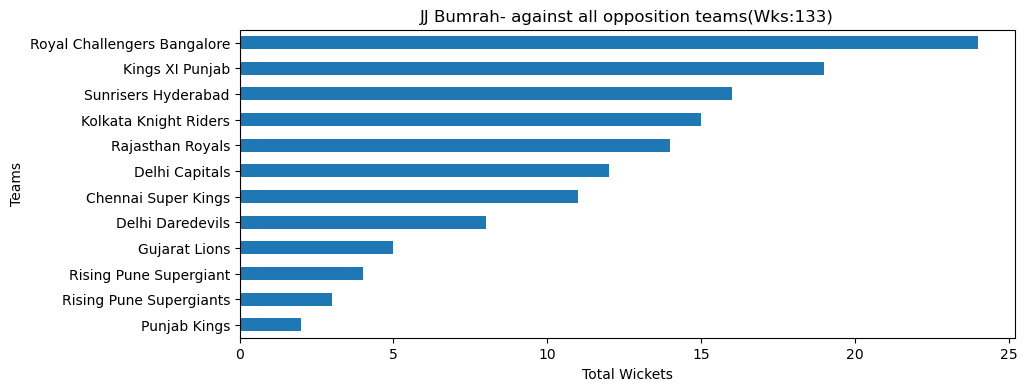

In [17]:
show_player('JJ Bumrah')

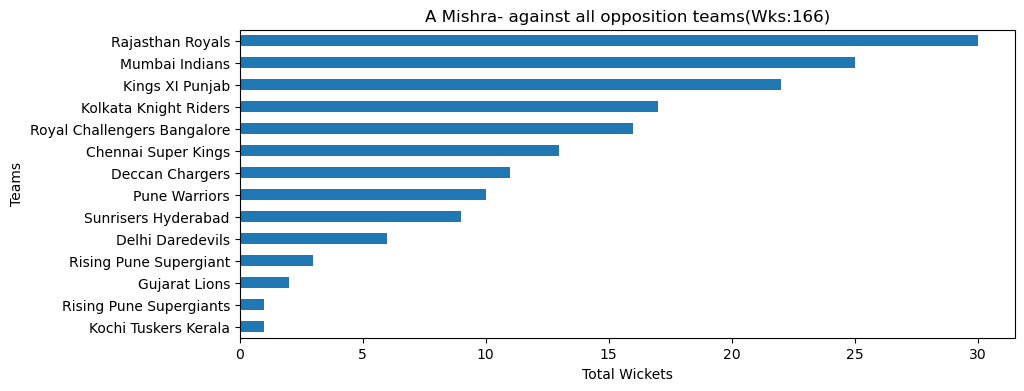

In [18]:
show_player('A Mishra')

In [19]:
midf = cdf[cdf.bowling_team == 'Mumbai Indians']

In [20]:
midf['date'] = pd.to_datetime(midf['date'])

In [21]:
midf['year'] = midf['date'].dt.year

In [22]:
midf.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,total_runs,bowlerswk,phase,year
373,1082592,2,0.1,0,1,Rising Pune Supergiant,Mumbai Indians,AM Rahane,MA Agarwal,TG Southee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1,0,PowerPlay,2017
374,1082592,2,0.2,0,2,Rising Pune Supergiant,Mumbai Indians,MA Agarwal,AM Rahane,TG Southee,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,4,0,PowerPlay,2017
375,1082592,2,0.3,0,3,Rising Pune Supergiant,Mumbai Indians,MA Agarwal,AM Rahane,TG Southee,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1,0,PowerPlay,2017
376,1082592,2,0.4,0,4,Rising Pune Supergiant,Mumbai Indians,MA Agarwal,AM Rahane,TG Southee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1,0,PowerPlay,2017
377,1082592,2,0.5,0,5,Rising Pune Supergiant,Mumbai Indians,AM Rahane,MA Agarwal,TG Southee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,0,0,PowerPlay,2017


In [23]:
pd.DataFrame(midf.groupby(['bowler'])['season'].unique())

,season
bowler,
A Dananjaya,[2018]
A Nehra,[2007/08]
A Nel,[2007/08]
A Symonds,[2011]
AF Milne,[2021]
AG Murtaza,"[2009/10, 2011]"
AM Nayar,"[2007/08, 2009]"
AM Rahane,[2009]
AN Ahmed,"[2009/10, 2011, 2012, 2013]"


In [24]:
pd.DataFrame(midf[midf.year == 2021 ]['bowler'].unique())

,0
0,TA Boult
1,JJ Bumrah
2,M Jansen
3,KH Pandya
4,RD Chahar
5,KA Pollard
6,RG Sharma
7,AF Milne
8,J Yadav
9,NM Coulter-Nile


In [25]:
cdf[(cdf['venue'] == 'Wankhede Stadium') & (cdf['phase'] == 'Middle')].head(5)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,total_runs,bowlerswk,phase
1466,1082597,1,6.1,6,1,Kolkata Knight Riders,Mumbai Indians,MK Pandey,CA Lynn,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1,0,Middle
1467,1082597,1,6.2,6,2,Kolkata Knight Riders,Mumbai Indians,CA Lynn,MK Pandey,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1,0,Middle
1468,1082597,1,6.3,6,3,Kolkata Knight Riders,Mumbai Indians,MK Pandey,CA Lynn,KH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,0,0,Middle
1469,1082597,1,6.4,6,4,Kolkata Knight Riders,Mumbai Indians,MK Pandey,CA Lynn,KH Pandya,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,2,0,Middle
1470,1082597,1,6.5,6,5,Kolkata Knight Riders,Mumbai Indians,MK Pandey,CA Lynn,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1,0,Middle
